
<center><img src="https://miro.medium.com/max/693/1*X-oZNRw5Pnef-kR9CgLx1g.png"></center>

<b><h1><center><span style='background :lightblue' >Neural Network</span></center></h1></b>

<h2><center><span style='background :teal' >Bank Churn Prediction</span></center></h2>


## Description

### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

### **Data Dictionary**

* **CustomerId:** Unique ID which is assigned to each customer
* **Surname:** Last name of the customer
* **CreditScore:** It defines the credit history of the customer
* **Geography:** A customer’s location
* **Gender:** It defines the Gender of the customer 
* **Age:** Age of the customer 
* **Tenure:** Number of years for which the customer has been with the bank
* **NumOfProducts:** It refers to the number of products that a customer has purchased through the bank
* **Balance:** Account balance
* **HasCrCard:** It is a categorical variable that decides whether the customer has a credit card or not
* **EstimatedSalary:** Estimated salary 
* **isActiveMember:**  It is a categorical variable that decides whether the customer is an active member of the bank or not
* **Exited:** 0 – No ( Customer did not leave the bank ), 1 – Yes ( Customer left the bank )

## **Introductory Steps**

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from keras import callbacks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")


### Loading the Data

In [2]:
Data = pd.read_csv('Churn.csv')

In [3]:
# Checking the number of rows and columns in the data
Data.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

### Data Overview

In [4]:
# Let's view the first 5 rows of the data
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Let's view the last 5 rows of the data
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000  observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical.


In [7]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

In [8]:
# Let's check for missing values in the data
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [9]:
Data["Exited"].value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [10]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Observations

* There are no missing values. Also RowNumber and CustomerId are not needed for Analysis.

* CreditScore ranges from 350 to 850 a mean of 650.

* The age of customers ranges from 18 years to as high as 92 years. Mean is around 39 years while median is 38 years. 75% of customers are under 44 years. This shows presence of outliers.

* Tenure ranges from 0 (new customer) to customers with 10 years tenure. Mean is 5 years.

* 25% of customers have 0 minimum balance. 50% of people have less than 97K

* Minimum number of products taken by a customer is 1 while maximum is 4. Also maximum number of people have Credit Card.

* Active members count is categorical where 0 represents not active and 1 for customers who are active

* Maximum Estimated salary is around 200000 while minimum is only 11.58 which is a very wide range.

* Target feature has 2 values 0(Customers didn't leave) and 1(Customers left). Most of the customers have not left the bank (0).


In [11]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


In [12]:
# Let's check the number of unique values in each column
Data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* **'CustomerId' and 'RowNumber'** are unique identifier for the customer. Hence it can be dropped as it will not add any predictive power or value to the model.
* The **'CreditScore','Age','Balance' and 'EstimatedSalary'** columns have many unique categories.
* But **'Geography','Gender','Tenure', 'NumOfProducts', 'HasCrCard', and 'IsActiveMember'** columns have less unique value and which can be considered as categories .
* **'Exited'** is the Target column with Binary classification

### Data Pre-processing

## **EDA**

### Univariate Analysis

In [13]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
Data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

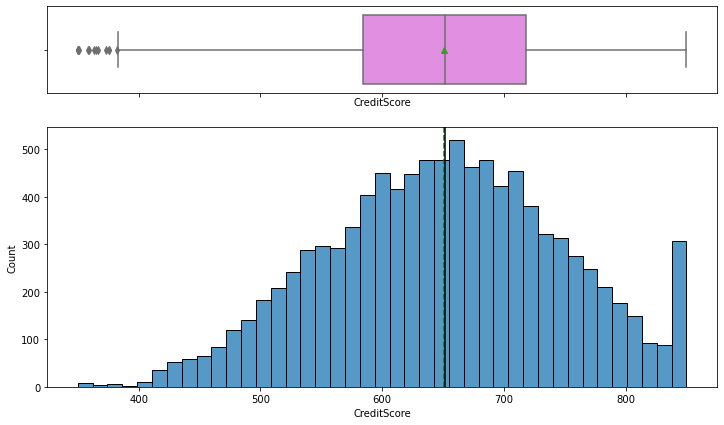

In [15]:
histogram_boxplot(Data, "CreditScore")

* From the above plot, we observe that 'CreditScore' distribution is almost normal with mean and median coinciding. There is hike in observations for CreditScore equal to 850. 

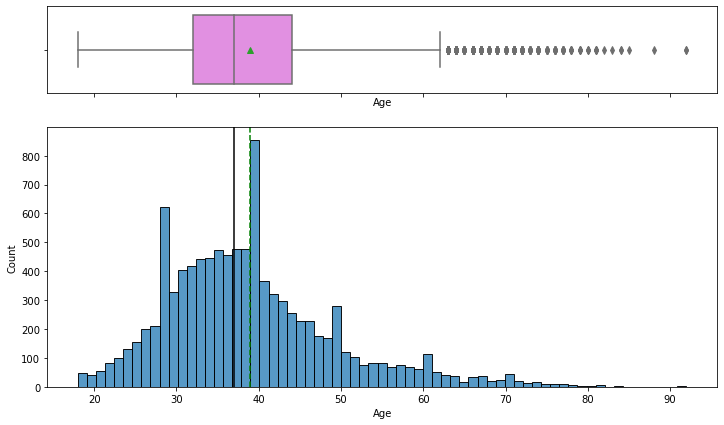

In [16]:
histogram_boxplot(Data, "Age")

* From the plot, we observe that Age distribution is right skewed with big chunk of customers at 40 years of age.

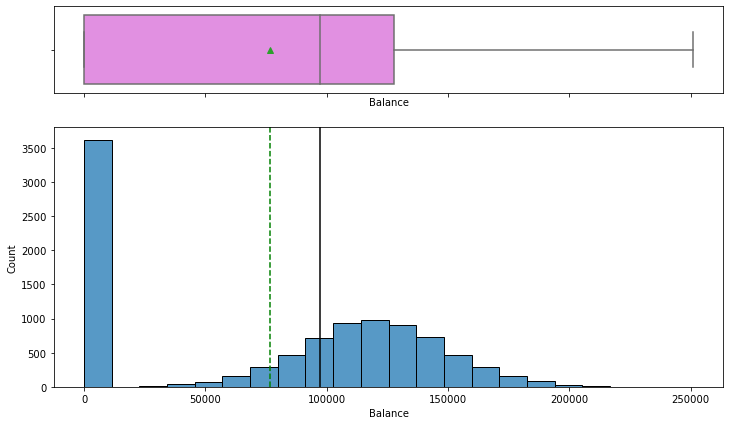

In [17]:
histogram_boxplot(Data, "Balance")

Almost 1/3rd of the customers have 0 account balance. The distribution is looks normal if we are not considering 0 balalnce. The median is at 97k while the mean is at around 79k though the maximum balance is 250k

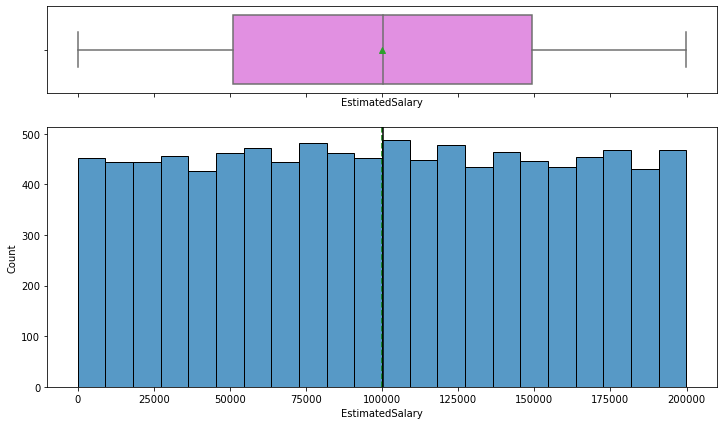

In [18]:
histogram_boxplot(Data, "EstimatedSalary")

In [19]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

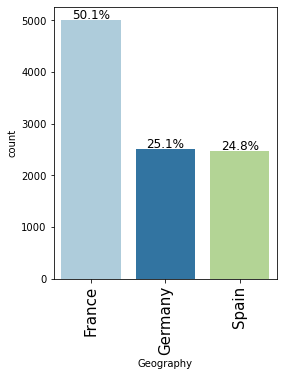

In [20]:
labeled_barplot(Data, "Geography", perc=True)

* Half of the customers (50%) are from France. 
* Remaining all the customers are from Germany and Spain with equal distribution. 

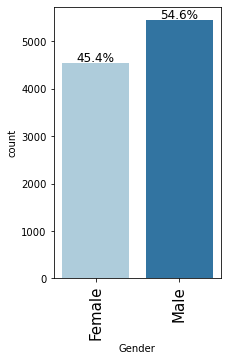

In [21]:
labeled_barplot(Data, "Gender",perc=True)

* Male customers are slightly higher than in count than Female customers. 

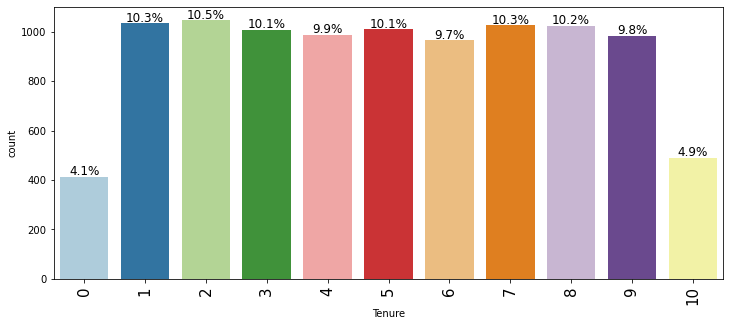

In [22]:
labeled_barplot(Data, "Tenure",perc=True)

* Customers are with the bank for varying years say 0 to 10 .
* Approximately 4% with 0 years (New) and 6% are with bank for 10 years (old).
* In all the remaining categories we have 10% of customers.

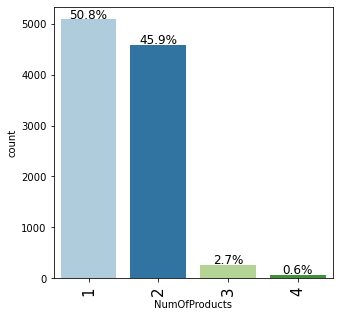

In [23]:
labeled_barplot(Data, "NumOfProducts",perc=True)

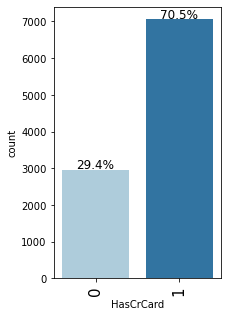

In [24]:
labeled_barplot(Data, "HasCrCard",perc=True)

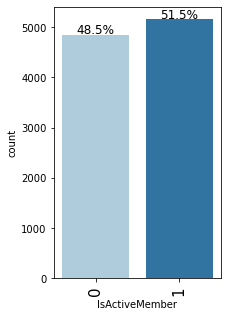

In [25]:
labeled_barplot(Data, "IsActiveMember",perc=True)

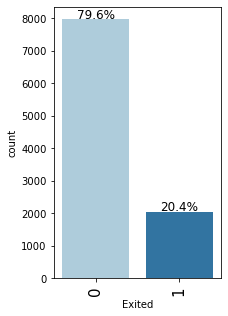

In [26]:
labeled_barplot(Data, "Exited",perc=True)

* NumOfProducts:There are 4 Products, but 1 & 2 are high in number
* HasCrCard: 70% of Customers has Credit Cardand remaining 30% doesn't have one. 
* IsActiveMember: We have equal number of customers in Active and Inactive.
* Exited: Approx 80% of customers didn't leave the bank within six months but remaining 20% left the bank.

0    7963
1    2037
Name: Exited, dtype: int64


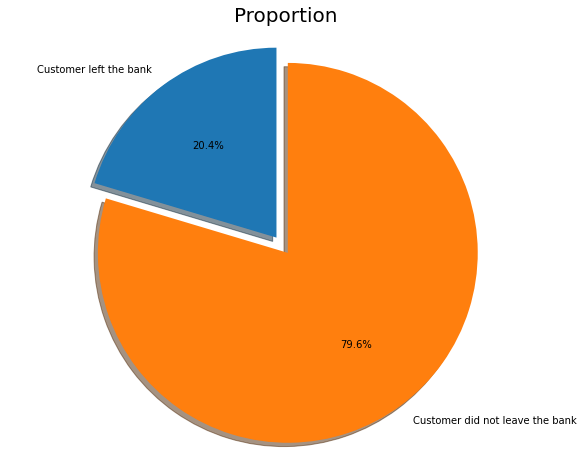

In [27]:
print(Data.Exited.value_counts())
labels = 'Customer left the bank', 'Customer did not leave the bank'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [Data.Exited[Data['Exited']==1].count(),Data.Exited[Data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

* This pie chart shows that the actual distribution of classes is imbalanced for the target variable.
* Only ~20% of the Customers in this dataset are actually left the bank.

Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced target variables.

### Bivariate Analysis

In [28]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

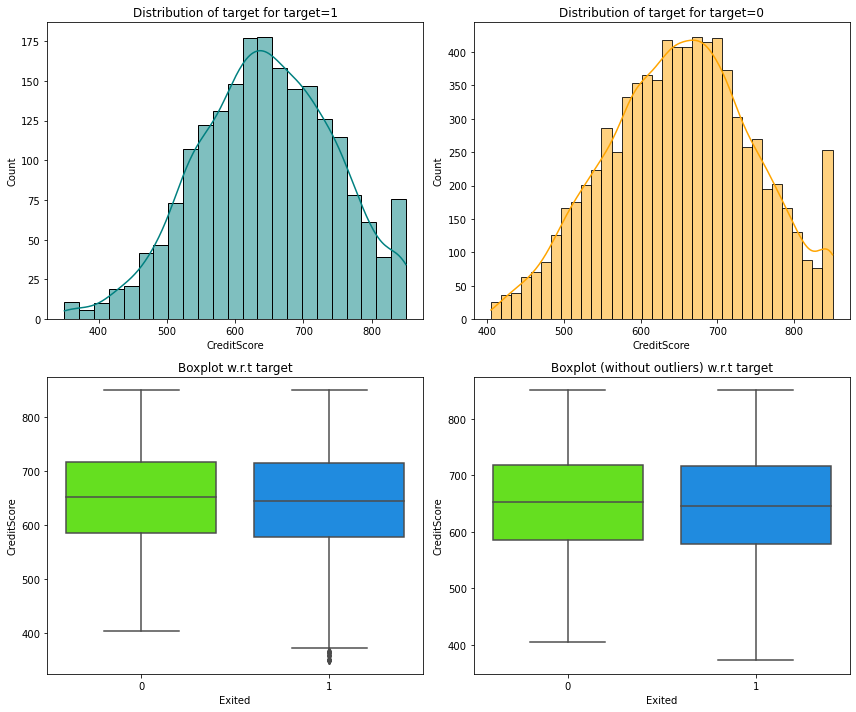

In [29]:
distribution_plot_wrt_target(Data, "CreditScore", "Exited")

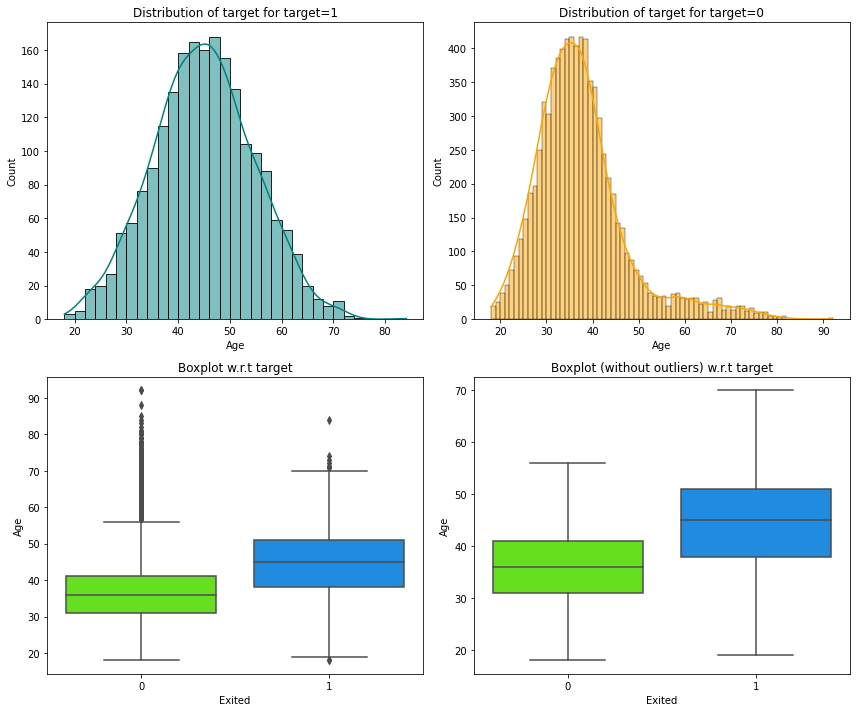

In [30]:
distribution_plot_wrt_target(Data, "Age", "Exited")

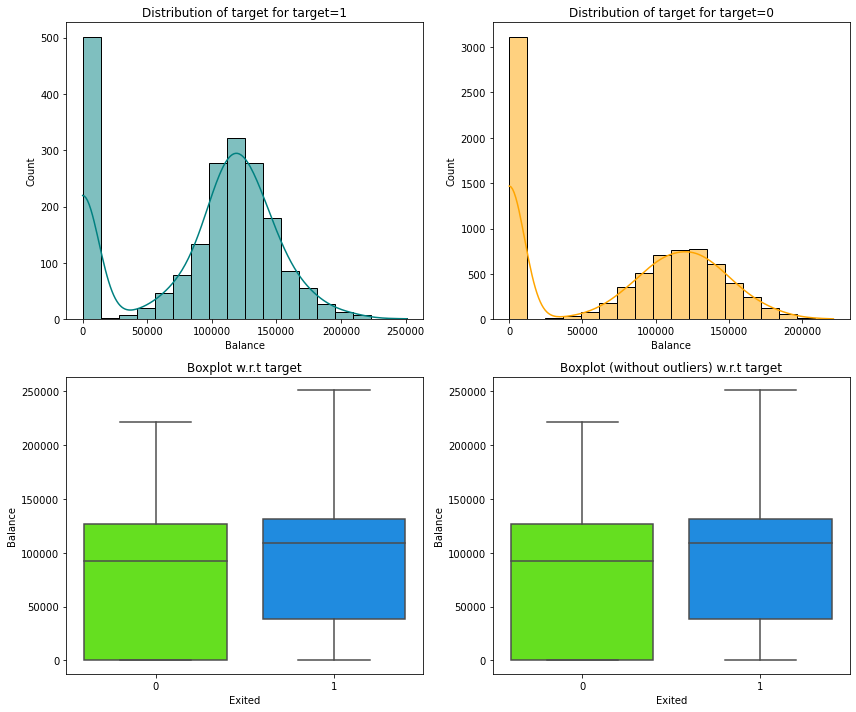

In [31]:
distribution_plot_wrt_target(Data, "Balance", "Exited")

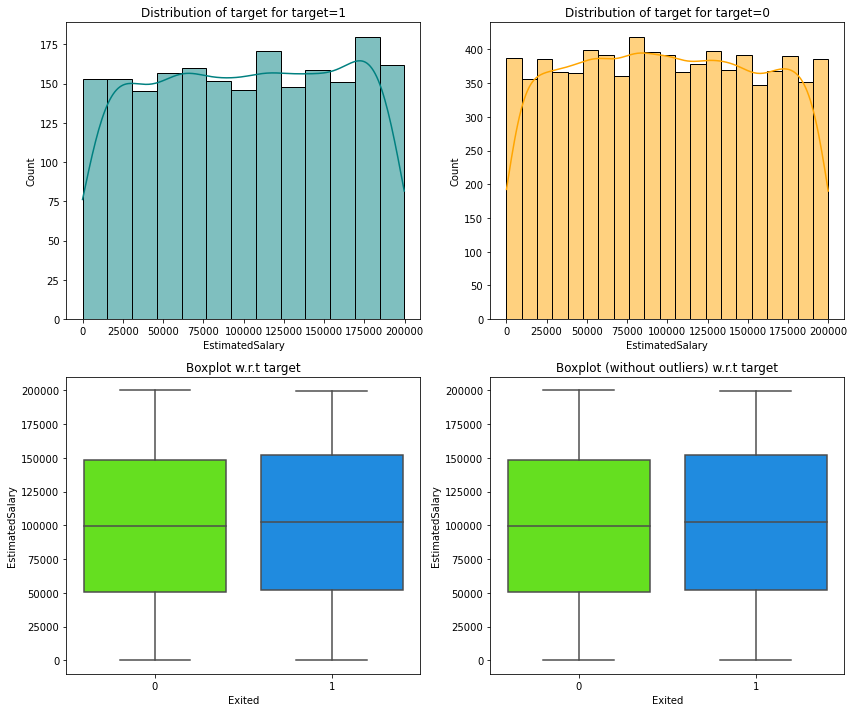

In [32]:
distribution_plot_wrt_target(Data, "EstimatedSalary", "Exited")

### Observations

* The Credit Score is almost normally distributed among both customers with some peaks. 

* The Age of customers is almost normally distributed among both type customers 
* Customers who didn't leave the bank is right skewed, which means that the Aged people wish to change the bank.

* The Estimated Salary of customers is uniformly distributed among both type customers
* Count of Type 1 customer who left the bank varies around 140 to 180
* Count of Type 0 customer who did not leave the bank varies around 340 to 420

* The Balance of customers is almost normally distributed among both type customers
* But we do have peaks in value '0' which means that Customers in both catagories are having lot of '0' balance

In [33]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


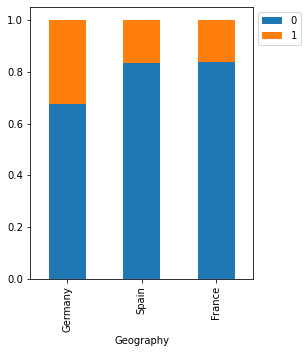

In [34]:
stacked_barplot(Data, "Geography", "Exited")

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


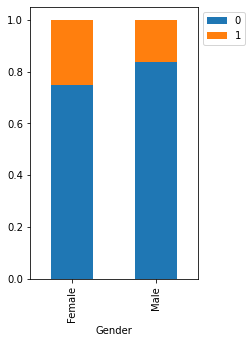

In [35]:
stacked_barplot(Data, "Gender", "Exited")

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


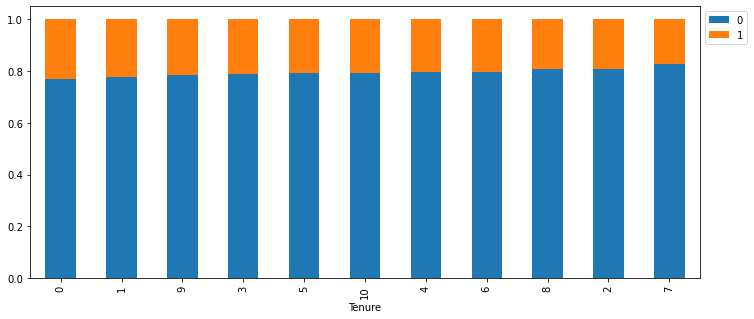

In [36]:
stacked_barplot(Data, "Tenure", "Exited")

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


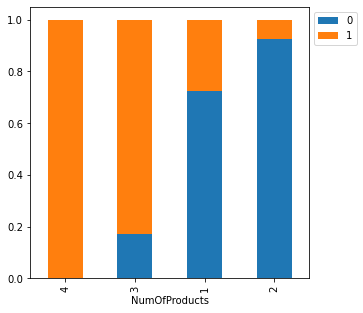

In [37]:
stacked_barplot(Data, "NumOfProducts", "Exited")

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


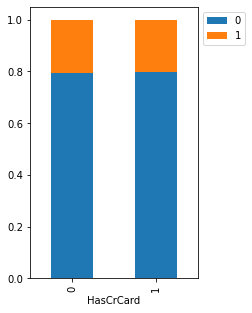

In [38]:
stacked_barplot(Data, "HasCrCard", "Exited")

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


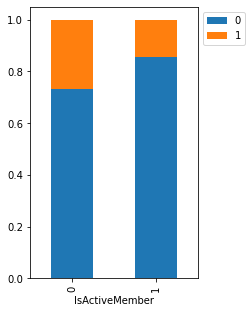

In [39]:
stacked_barplot(Data, "IsActiveMember", "Exited")

### Observation

* In all the three Geography, Customers who left the bank is less than the Customers who didn't leave
* Same way in both genders, customers who left the bank is less than the Customers who didn't leave. But % of customers who left the bank is more in Female
* If at all we have more % of customers who didn't leave the bank from 0 to 10 years of Tenure. But the % is almost the same.
* All the customers who had product 4, left the bank. Also churn rate of product 3 customers are high.
* But Product 1 & 2 customers didn't leave the bank. The % of customers who left the bank is less. 
* Customers with or without card have same churn percentage
* Almost 27% of non active customers have exited the bank. The churn percentage among the active members is much less

### Dropping the columns 

In [40]:
###Dropping these columns as they will not add value to the modeling
Data.drop(["RowNumber", "CustomerId","Surname"], axis=1, inplace=True)

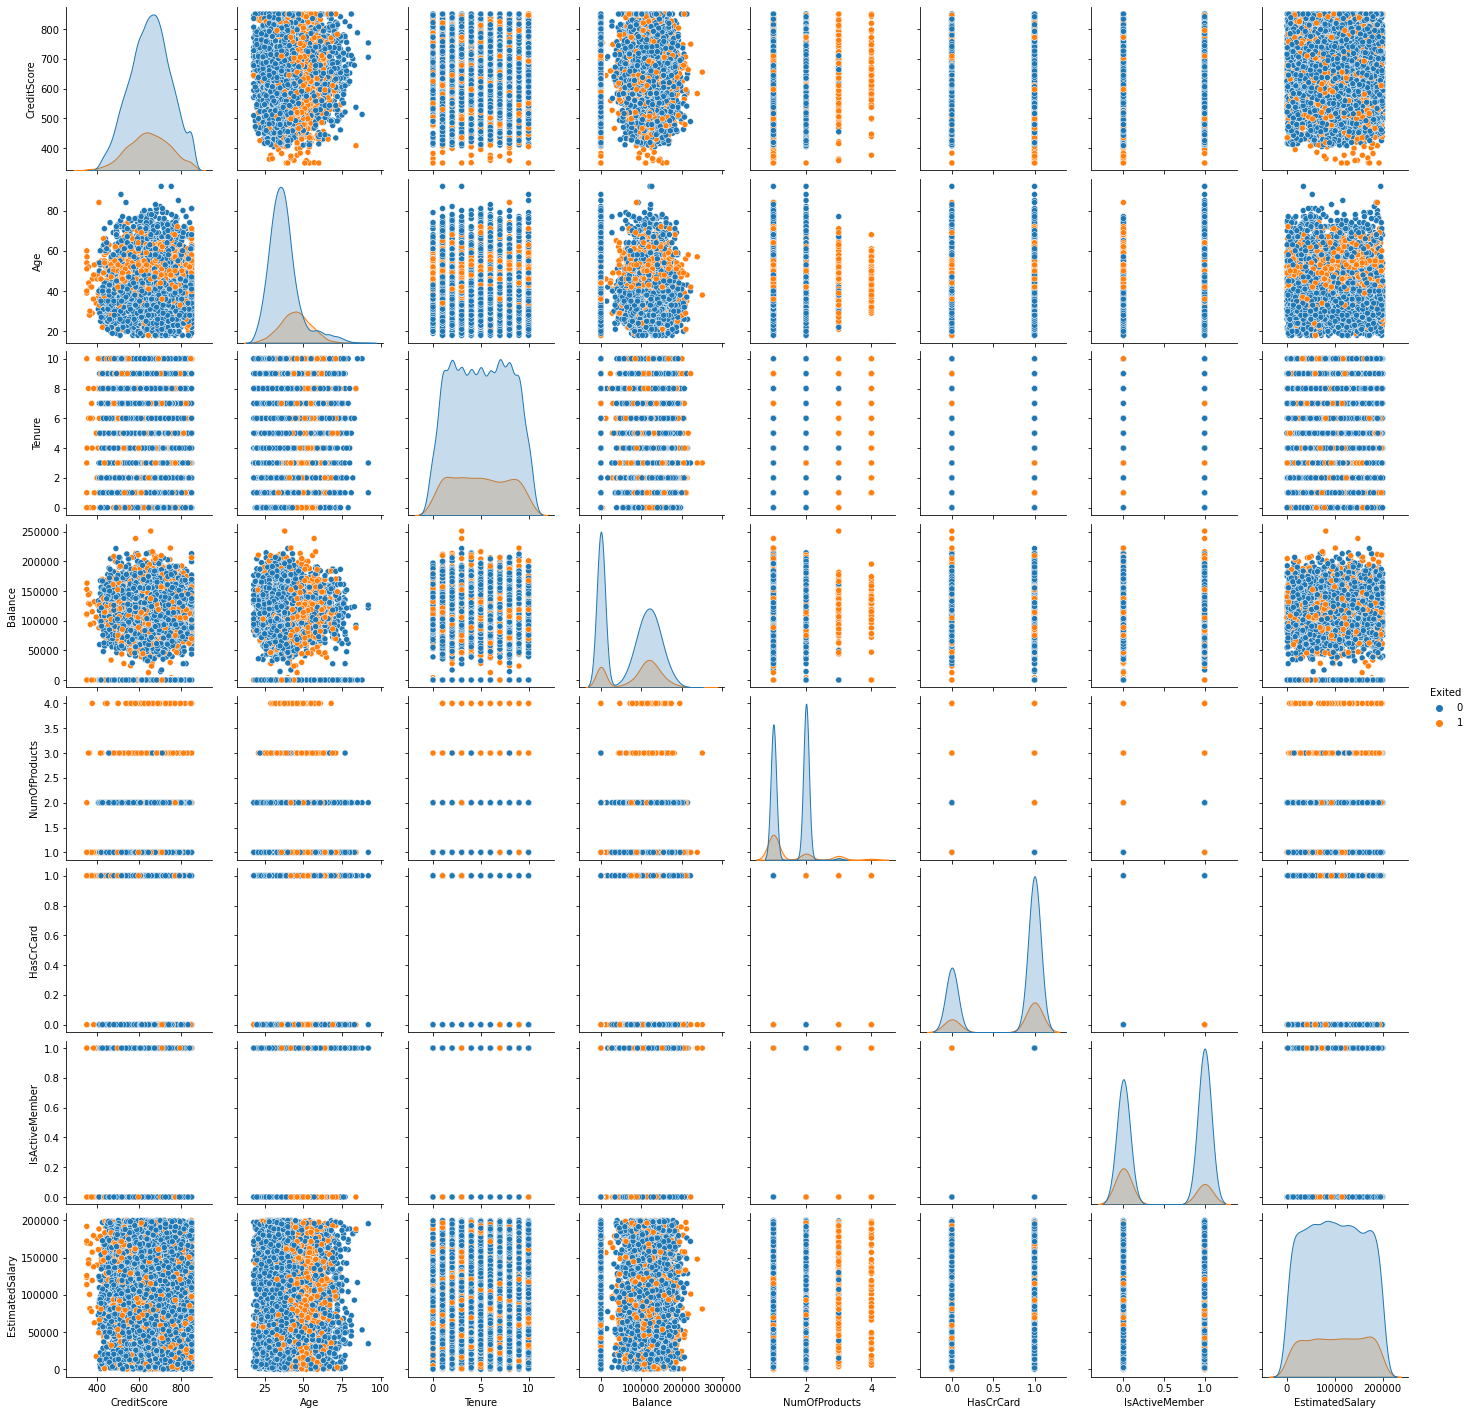

In [41]:
sns.pairplot(Data, hue="Exited")

### Observation

* Customers at a higher age group mostly above 50 years have not exited the bank compared to customers at lesser age
* Most of customers who have purchased 3 or more products have exited the bank.
* Customers at a very low CreditScore (>=400),have not stayed with the bank and exited the bank
* Customers of age 50 or above and have been inactive have mostly exited the bank.
* Customers with 0 balance or very high balance and no bank card have exited the bank.

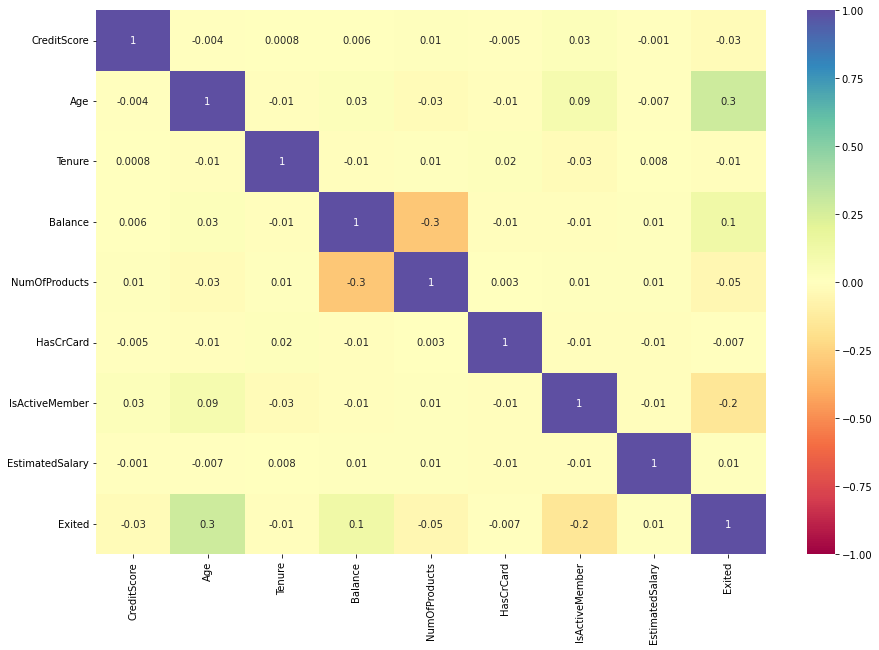

In [42]:
plt.figure(figsize=(15, 10))
sns.heatmap(Data.corr(), annot=True, vmin=-1, vmax=1, fmt=".1g", cmap="Spectral")
plt.show()

### Observation

* The target variable is directly related to age. Higher the age higher the exit rate.
* Bank balance is negatively corelated to Number of products purchased by the customer. More the balance lesser the number of products held by the customer.
* Churn of customers is also negatively related to Balance. Customers with more balance have exited the bank more.
* Less active number have exited the bank more.

## Preparing Data for Modeling

In [43]:
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Missing Value Imputation

In [44]:
# Checking that no column has missing values in train and test sets
print(Data.isna().sum())
print("-" * 30)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
------------------------------


* There is no missing value to impute. Data looks perfect.

## Outliers Treatment

In [45]:
num_cols=['CreditScore','Age','Balance','EstimatedSalary']

In [46]:
# Finding the 25th percentile and 75th percentile for the numerical columns.
Q1 = Data[num_cols].quantile(0.25)
Q3 = Data[num_cols].quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5 * IQR

In [47]:
# Percentage of outliers in each column
((Data[num_cols] < lower_whisker) | (Data[num_cols] > upper_whisker)).sum() / Data.shape[0] * 100

CreditScore        0.15
Age                3.59
Balance            0.00
EstimatedSalary    0.00
dtype: float64

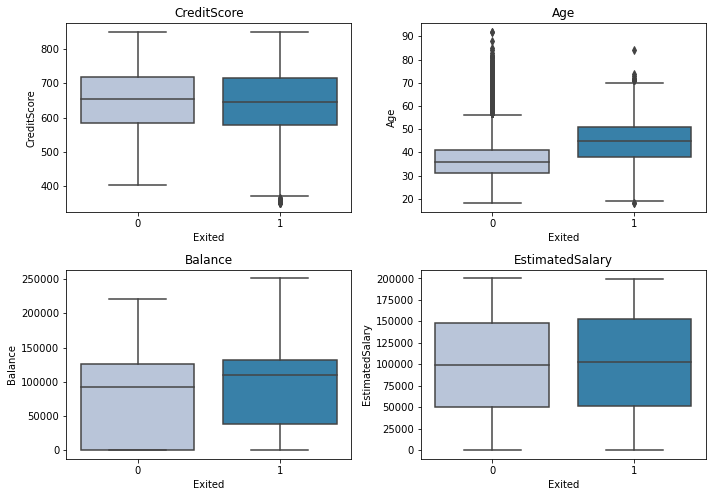

In [48]:
plt.figure(figsize=(10, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(Data["Exited"], Data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

* There is very little outlier in Credit Score which can be left as such
* Age is having more outliers but the values are continuous. So, its a real data which will be helpful for analysis. 

## Data Splitting

In [49]:
## Separating Independent and Dependent Columns
X = Data.drop(['Exited'],axis=1)
Y = Data[['Exited']]

In [50]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [51]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [52]:
X_train.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,753,France,Male,57,7,0.00,1,1,0,159475.08
8392,739,Germany,Male,32,3,102128.27,1,1,0,63981.37
5006,755,Germany,Female,37,0,113865.23,2,1,1,117396.25
4117,561,France,Male,37,5,0.00,2,1,0,83093.25
7182,692,Germany,Male,49,6,110540.43,2,0,1,107472.99
3522,659,France,Female,38,9,0.00,2,1,1,132809.18
8783,782,France,Male,34,9,0.00,1,1,0,183021.06
741,546,France,Male,24,8,156325.38,1,1,1,125381.02
1319,756,Germany,Male,41,2,124439.49,2,0,1,47093.11
2922,685,Spain,Male,34,6,83264.28,1,0,0,9663.28


In [53]:
# Checking the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 10)
(8000, 1)
(2000, 10)
(2000, 1)


### Encoding Categorical Columns

In [54]:
## Separating all the categorical columns for imputation
cat_cols = ['Geography','Gender','Tenure','NumOfProducts']

In [55]:
# Using pd.get dummies to encode the categorical columns in the data
X_train = pd.get_dummies(X_train,columns=cat_cols,drop_first= True)
X_test = pd.get_dummies(X_test,columns=cat_cols,drop_first= True)

In [56]:
X_train.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,...,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
2151,753,57,0.00,1,0,159475.08,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8392,739,32,102128.27,1,0,63981.37,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5006,755,37,113865.23,1,1,117396.25,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4117,561,37,0.00,1,0,83093.25,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
7182,692,49,110540.43,0,1,107472.99,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [57]:
y_train.head()

,Exited
2151,1
8392,1
5006,0
4117,0
7182,0


In [58]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 22)
(2000, 22)
(8000, 1)
(2000, 1)


## Data Scaling

In [59]:
## Scaling the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Balance","EstimatedSalary","Age"]])
X_train[["CreditScore","Balance","EstimatedSalary","Age"]] = temp.transform(X_train[["CreditScore","Balance","EstimatedSalary","Age"]])
X_test[["CreditScore","Balance","EstimatedSalary","Age"]] = temp.transform(X_test[["CreditScore","Balance","EstimatedSalary","Age"]])

In [60]:
X_train.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,...,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
2151,1.058568,1.715086,-1.226059,1,0,1.042084,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8392,0.913626,-0.659935,0.413288,1,0,-0.623556,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5006,1.079274,-0.184931,0.601687,1,1,0.308128,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4117,-0.929207,-0.184931,-1.226059,1,0,-0.290199,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
7182,0.427035,0.955079,0.548318,0,1,0.135042,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0


## **Model Building**

#### **A model can make wrong predictions in the following ways:**

* Predicting a customer will exit but in reality the customer did not exit
* Predicting a customer will not exit but in reality the customer exits

#### **Which case is more important?**

Both cases are actually important for the purposes of this case study.But Predicting a customer will not exit but in reality the customer exits is more important as it is a loss. Bank needs to identify the aspects which lead to churn of customers for which all class 1 (customers who exit) should be correctly predicted

#### **How to reduce this loss i.e need to reduce False Negatives?**

Bank would want to maximize Recall. By doing this it will reduce false negative and maximize True positive thus will try to predict all class 1 entries


### Basic Model 

In [61]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [62]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim =X_train.shape[1], units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid as it is a binary classification
model.add(Dense(1, activation = 'sigmoid')) 

In [63]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1472      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [65]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4983 - accuracy: 0.7920 - val_loss: 0.4440 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.7955 - val_loss: 0.4265 - val_accuracy: 0.8025
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.7973 - val_loss: 0.4163 - val_accuracy: 0.8031
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4163 - accuracy: 0.8030 - val_loss: 0.4090 - val_accuracy: 0.8062
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8095 - val_loss: 0.4036 - val_accuracy: 0.8106
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8120 - val_loss: 0.3988 - val_accuracy: 0.8156
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8175 - val_loss: 0.3948 - val_accuracy: 0.8244
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8620


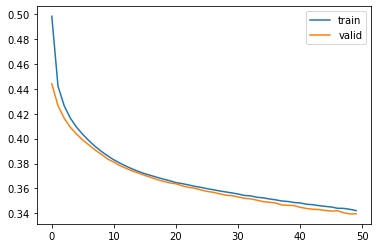

In [66]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

### Observation 

The accuracy curve for both train and test data have converged well with a very good accuracy of 86%

Let's check the other metrices.

In [67]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [68]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

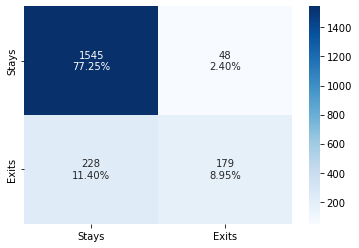

In [189]:
#Calculating the confusion matrix 
cm=confusion_matrix(y_test, y_pred)
categories = ['Stays','Exits']
make_confusion_matrix(cm, 
                      categories=categories, 
                      cmap='Blues')

Here, we have 0.5 as the threshold to the model, and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve. 

In [70]:
#Accuracy as per the classification report 
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



As you can see, the above model has a good accuracy but a poor recall score. This could be due to the imbalanced dataset. We observe that the False positive rates are also high, which should be considerably lower. 

1) **Imbalanced dataset**: As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the **0** class.

2) **Decision Threshold**: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.


Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

### Model 1

In [71]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [72]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [73]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5888      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,153
Trainable params: 49,153
Non-trainable params: 0
_________________________________________________________________


In [74]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4176 - accuracy: 0.8100 - val_loss: 0.3689 - val_accuracy: 0.8537
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3613 - accuracy: 0.8478 - val_loss: 0.3479 - val_accuracy: 0.8600
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 0.8530 - val_loss: 0.3404 - val_accuracy: 0.8650
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3338 - accuracy: 0.8605 - val_loss: 0.3411 - val_accuracy: 0.8631
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3263 - accuracy: 0.8609 - val_loss: 0.3418 - val_accuracy: 0.8650
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.8666 - val_loss: 0.3369 - val_accuracy: 0.8700
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3048 - accuracy: 0.8720 - val_loss: 0.3482 - val_accuracy: 0.8631
Epoch 

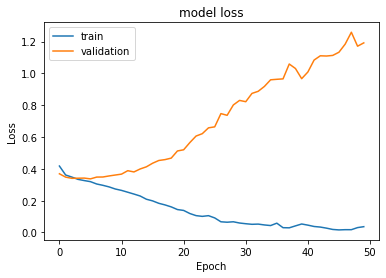

In [75]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As we increased the depth of the neural network and changed the optimizer to Adam, but the curve is not smooth. The loss curves for both train and validation is not converging.

Best Threshold=0.000961, G-Mean=0.715


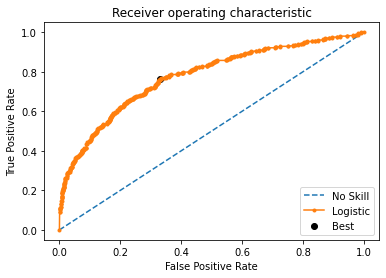

In [76]:
# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label ='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(), 

and select the threshold with the **largest G-Mean value.**

In [78]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

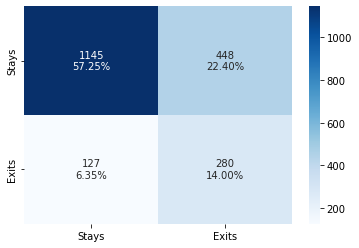

In [190]:
#Calculating the confusion matrix 
cm1=confusion_matrix(y_test, y_pred_e1)
categories = ['Stays','Exits']
make_confusion_matrix(cm1, 
                      categories=categories, 
                      cmap='Blues')

In [200]:
#Accuracy as per the classification report 
cr1=metrics.classification_report(y_test,y_pred_e1)
print(cr1)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.38      0.69      0.49       407

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.80      0.71      0.74      2000



As the number of layers in the neural network has increased, we can see that the recall score has increased. 

Now let's try to use the Batch Normalization technique and check to see if we can increase the recall score little more. 

### Model 2

In [81]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [82]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [83]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [84]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [85]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
100/100 [==============================] - 2s 5ms/step - loss: 0.4590 - accuracy: 0.7775 - val_loss: 0.4116 - val_accuracy: 0.8156
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.8520 - val_loss: 0.3707 - val_accuracy: 0.8406
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.8595 - val_loss: 0.3484 - val_accuracy: 0.8537
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.8652 - val_loss: 0.3420 - val_accuracy: 0.8587
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3128 - accuracy: 0.8683 - val_loss: 0.3299 - val_accuracy: 0.8687
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.8723 - val_loss: 0.3309 - val_accuracy: 0.8687
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2977 - accuracy: 0.8777 - val_loss: 0.3495 - val_accuracy: 0.8606

Epoch 58/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9681 - val_loss: 0.7219 - val_accuracy: 0.8150
Epoch 59/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0736 - accuracy: 0.9733 - val_loss: 0.7320 - val_accuracy: 0.8263
Epoch 60/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0750 - accuracy: 0.9709 - val_loss: 0.7540 - val_accuracy: 0.8231
Epoch 61/100
100/100 [==============================] - 0s 5ms/step - loss: 0.0828 - accuracy: 0.9669 - val_loss: 0.7556 - val_accuracy: 0.8119
Epoch 62/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0701 - accuracy: 0.9750 - val_loss: 0.7745 - val_accuracy: 0.8163
Epoch 63/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0741 - accuracy: 0.9728 - val_loss: 0.7599 - val_accuracy: 0.8131
Epoch 64/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0691 - accuracy: 0.9727 - val_loss: 0.7892 - val_accuracy:

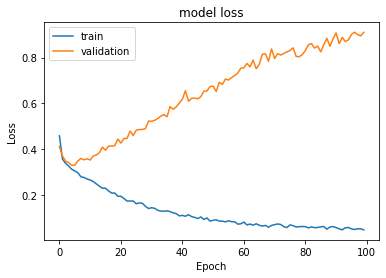

In [86]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Unfortunately, from the above plot we observe that there is a lot of noise in the model, and it and seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

Best Threshold=0.006559, G-Mean=0.728


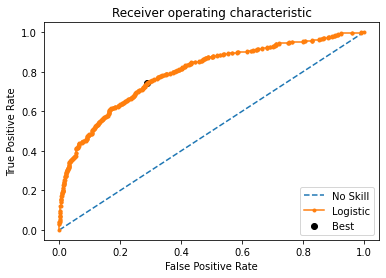

In [87]:
# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label ='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

In [88]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

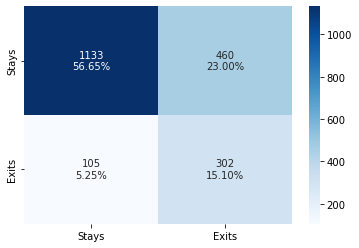

In [191]:
#Calculating the confusion matrix 
cm2=confusion_matrix(y_test, y_pred_e2)
categories = ['Stays','Exits']
make_confusion_matrix(cm2, 
                      categories=categories, 
                      cmap='Blues')

In [90]:
#Accuracy as per the classification report 
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1593
           1       0.40      0.74      0.52       407

    accuracy                           0.72      2000
   macro avg       0.66      0.73      0.66      2000
weighted avg       0.81      0.72      0.74      2000



There is some difference in the recall score. Let's try to use the Dropout technique and check to see if it can reduce the False Negative rate. 

### Model 3

In [91]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [92]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [93]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5888      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [94]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [95]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4493 - accuracy: 0.7959 - val_loss: 0.3829 - val_accuracy: 0.8456
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8383 - val_loss: 0.3566 - val_accuracy: 0.8500
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8464 - val_loss: 0.3471 - val_accuracy: 0.8662
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3566 - accuracy: 0.8530 - val_loss: 0.3384 - val_accuracy: 0.8637
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3514 - accuracy: 0.8556 - val_loss: 0.3350 - val_accuracy: 0.8650
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3472 - accuracy: 0.8589 - val_loss: 0.3339 - val_accuracy: 0.8706
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.8609 - val_loss: 0.3338 - val_accuracy: 0.8656
Epoch 

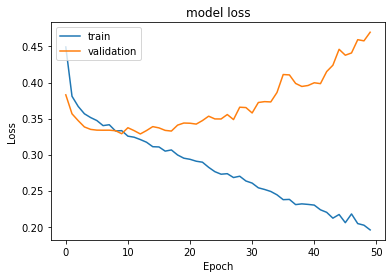

In [96]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both the curves train and validation are smooth.

Best Threshold=0.136751, G-Mean=0.747


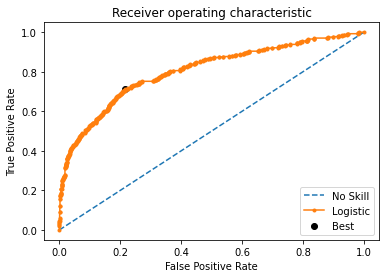

In [97]:
# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label ='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

In [98]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

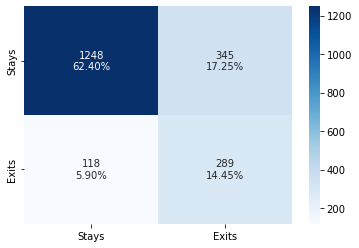

In [192]:
#Calculating the confusion matrix 
cm3=confusion_matrix(y_test, y_pred_e3)
categories = ['Stays','Exits']
make_confusion_matrix(cm3, 
                      categories=categories, 
                      cmap='Blues')

In [100]:
#Accuracy as per the classification report 
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1593
           1       0.46      0.71      0.56       407

    accuracy                           0.77      2000
   macro avg       0.68      0.75      0.70      2000
weighted avg       0.82      0.77      0.78      2000



The Dropout technique helped the model reduce the loss function of both train and validation. The recall score also seems to be fine, with a decrease in the False Negative rate. But still compare to the previous model, this method is not giving much improvement.

### Model 4 

In [101]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [102]:
model4 = Sequential()
#Adding the hidden and output layers
model4.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model4.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model4.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model4.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model4.add(Dense(1, activation = 'sigmoid'))

In [103]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5888      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,153
Trainable params: 49,153
Non-trainable params: 0
_________________________________________________________________


In [104]:
#Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

In [105]:
history4 = model4.fit(X_train,y_train,epochs=50,verbose=1,validation_split = 0.2,callbacks=es_cb)

Epoch 1/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4000 - accuracy: 0.8266 - val_loss: 0.3706 - val_accuracy: 0.8469
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3577 - accuracy: 0.8537 - val_loss: 0.3439 - val_accuracy: 0.8581
Epoch 3/50
200/200 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8581 - val_loss: 0.3469 - val_accuracy: 0.8575
Epoch 4/50
200/200 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8630 - val_loss: 0.3391 - val_accuracy: 0.8631
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.8683 - val_loss: 0.3356 - val_accuracy: 0.8644
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8703 - val_loss: 0.3339 - val_accuracy: 0.8637
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3015 - accuracy: 0.8737 - val_loss: 0.3425 - val_accuracy: 0.8581
Epoch 

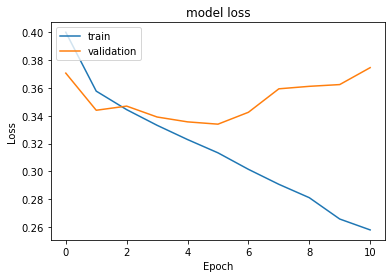

In [106]:
#Plotting Train Loss vs Validation Loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.168577, G-Mean=0.761


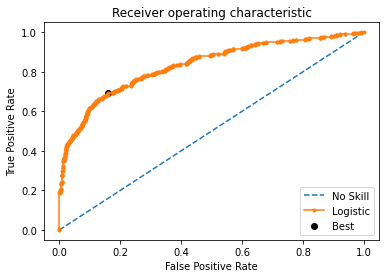

In [107]:
# predict probabilities
yhat4 = model4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label ='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

In [108]:
#Predicting the results using best as a threshold
y_pred_e4=model4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

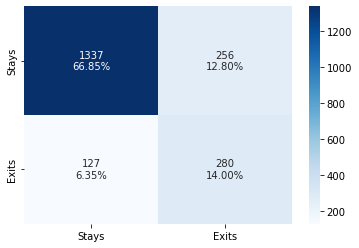

In [193]:
#Calculating the confusion matrix 
cm4=confusion_matrix(y_test, y_pred_e4)
categories = ['Stays','Exits']
make_confusion_matrix(cm4, 
                      categories=categories, 
                      cmap='Blues')

In [201]:
#Accuracy as per the classification report 
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1593
           1       0.52      0.69      0.59       407

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.73      2000
weighted avg       0.83      0.81      0.82      2000



Early stopping helped to control the Epoch which is not very much needed. But 69% is not so good recall compare to the previous two models. So, we can try a different Regularization technique. 

### Model 5

In [111]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [112]:
from keras import regularizers

In [113]:
model5 = Sequential()
model5.add(Dense(128,activation='relu',kernel_initializer='he_normal',input_dim = X_train.shape[1]))
model5.add(Dropout(0.2))
model5.add(Dense(64,activation='relu',kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model5.add(Dropout(0.2))
model5.add(Dense(32,activation='relu',kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model5.add(Dense(1, activation = 'sigmoid'))

In [114]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,313
Trainable params: 13,313
Non-traina

In [115]:
optimizer = tf.keras.optimizers.Adam(0.001)
model5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [116]:
history5 = model5.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 1.8133 - accuracy: 0.7859 - val_loss: 1.2754 - val_accuracy: 0.8269
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 1.0124 - accuracy: 0.8233 - val_loss: 0.7761 - val_accuracy: 0.8450
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.6765 - accuracy: 0.8314 - val_loss: 0.5636 - val_accuracy: 0.8537
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.8395 - val_loss: 0.4720 - val_accuracy: 0.8562
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.8408 - val_loss: 0.4277 - val_accuracy: 0.8544
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.8395 - val_loss: 0.4024 - val_accuracy: 0.8550
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4146 - accuracy: 0.8417 - val_loss: 0.3941 - val_accuracy: 0.8519
Epoch 

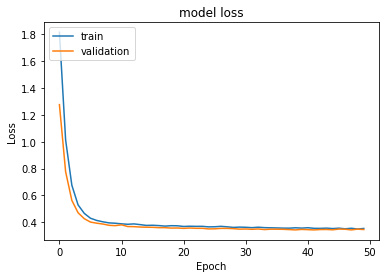

In [117]:
#Plotting Train Loss vs Validation Loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.133548, G-Mean=0.772


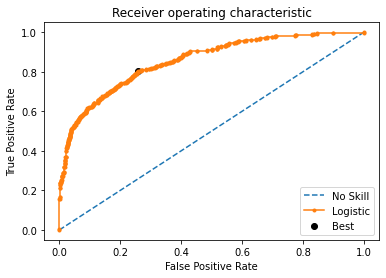

In [118]:
# predict probabilities
yhat5 = model5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label ='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

In [119]:
y_pred_e5=model5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

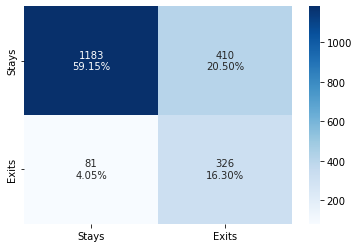

In [194]:
#Calculating the confusion matrix 
cm5=confusion_matrix(y_test, y_pred_e5)
categories = ['Stays','Exits']
make_confusion_matrix(cm5, 
                      categories=categories, 
                      cmap='Blues')

In [121]:
#Accuracy as per the classification report 
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1593
           1       0.44      0.80      0.57       407

    accuracy                           0.75      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.75      0.78      2000



### Observation

* Compare to all the previous models, the recall score is much better in this model. 

* Below are the few Regularization techniques we used in the above models:
-- Batch Normalization
-- DropOut
-- Early Stopping
-- L2 Regularization

* In the above 4 methods, L2 gave a good Recall score. 

### Now, let's try to use some of the Hyperparameter Optimization techniques we have learnt, such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the recall score of the model.

### Model 6

#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [122]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [123]:
def create_model_v6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We are using Random search to optimize two hyperparameters - **Batch size** & **Learning Rate**.

You can also optimize other hyperparameters as mentioned above.



In [124]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [125]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 2s 5ms/step - loss: 0.4307 - accuracy: 0.8092 - val_loss: 0.3722 - val_accuracy: 0.8506
Best: 0.834749 using {'lr': 0.001, 'batch_size': 32}


Let's create the final model with the above mentioned configuration

In [126]:
estimator_v6=create_model_v6(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               5888      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [127]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_6=estimator_v6.fit(X_train, y_train, epochs=50, batch_size = random_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.4271 - accuracy: 0.8120 - val_loss: 0.3727 - val_accuracy: 0.8531
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3878 - accuracy: 0.8345 - val_loss: 0.3604 - val_accuracy: 0.8537
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3701 - accuracy: 0.8436 - val_loss: 0.3497 - val_accuracy: 0.8606
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3634 - accuracy: 0.8483 - val_loss: 0.3433 - val_accuracy: 0.8631
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3603 - accuracy: 0.8506 - val_loss: 0.3354 - val_accuracy: 0.8662
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.8552 - val_loss: 0.3306 - val_accuracy: 0.8712
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3478 - accuracy: 0.8584 - val_loss: 0.3349 - val_accuracy: 0.8662
Epoch 

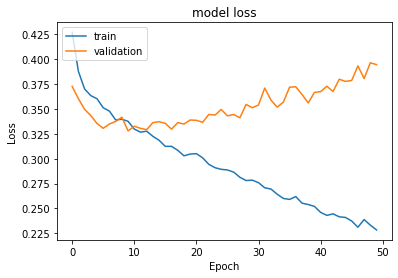

In [128]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is noise in the training behavior of the model.

Best Threshold=0.113560, G-Mean=0.742


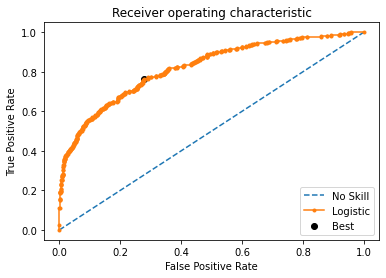

In [129]:
# predict probabilities
yhat6 = estimator_v6.predict(X_test)
# keep probabilities for the positive outcome only
yhat6 = yhat6[:, 0]
# calculate roc curves
fpr, tpr, thresholds6 = roc_curve(y_test, yhat6)
# calculate the g-mean for each threshold
gmeans6 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans6)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds6[ix], gmeans6[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label ='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

In [130]:
y_pred_e6=estimator_v6.predict(X_test)
y_pred_e6 = (y_pred_e6 > thresholds6[ix])
y_pred_e6

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

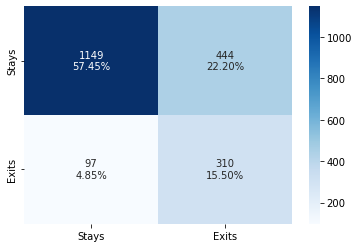

In [195]:
#Calculating the confusion matrix 
cm6=confusion_matrix(y_test, y_pred_e6) 
categories = ['Stays','Exits']
make_confusion_matrix(cm6, 
                      categories=categories, 
                      cmap='Blues')

In [132]:
#Accuracy as per the classification report 
cr6=metrics.classification_report(y_test,y_pred_e6)
print(cr6)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1593
           1       0.41      0.76      0.53       407

    accuracy                           0.73      2000
   macro avg       0.67      0.74      0.67      2000
weighted avg       0.82      0.73      0.75      2000



Hyperparameter tuning is used here to get a better Recall score, but this score may differ each time. 

Other hyperparameters can also be tuned to get better performance on the metrics. 

Here, the Recall score of the model has decreased little bit in comparison to the previous best performance, as Random Search CV will choose the hyperparameters randomly, and hence has a very low chance of finding a highly optimal configuration. 

Let's use the more exhaustive Grid Search CV and see if the recall score increases. 

### Model 7

#### **Grid Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [133]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [134]:
def create_model_v7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We're using Grid Search to optimize two hyperparameters - **Batch Size** & **Learning Rate**. 

You can also optimize the other hyperparameters as mentioned above.

In [135]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [136]:
import time
  
# store starting time
begin = time.time()
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 0.4147 - accuracy: 0.8252 - val_loss: 0.3774 - val_accuracy: 0.8275
Best: 0.838125 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 11.991636037826538


Let's create the final model with the above mentioned configuration

In [137]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               5888      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [138]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_train, y_train, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.4128 - accuracy: 0.8244 - val_loss: 0.3736 - val_accuracy: 0.8319
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3856 - accuracy: 0.8400 - val_loss: 0.3564 - val_accuracy: 0.8569
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3824 - accuracy: 0.8445 - val_loss: 0.3558 - val_accuracy: 0.8644
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3753 - accuracy: 0.8497 - val_loss: 0.3455 - val_accuracy: 0.8606
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3695 - accuracy: 0.8520 - val_loss: 0.3368 - val_accuracy: 0.8681
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3632 - accuracy: 0.8503 - val_loss: 0.3362 - val_accuracy: 0.8587
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3597 - accuracy: 0.8534 - val_loss: 0.3455 - val_accuracy: 0.8600
Epoch 

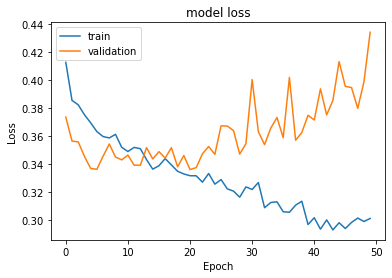

In [139]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both curves - train and validation, are smooth.

Best Threshold=0.203492, G-Mean=0.759


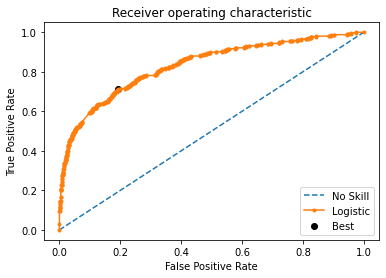

In [140]:
# predict probabilities
yhat7 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label ='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

In [141]:
y_pred_e7=estimator_v7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

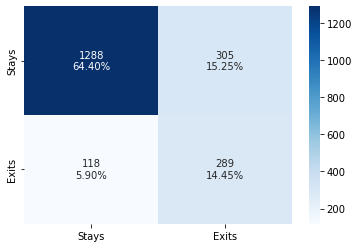

In [196]:
#Calculating the confusion matrix 
cm7=confusion_matrix(y_test, y_pred_e7)
categories = ['Stays','Exits']
make_confusion_matrix(cm7, 
                      categories=categories, 
                      cmap='Blues')

In [143]:
#Accuracy as per the classification report 
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.71      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



Hyperparameter tuning with Grid Search has been used here to get a better recall score here. 

Other hyperparameters can also be tuned to get better metrics. 

The recall score of the model is slightly not better than in Randomized Search, but this is same as Model 3 (the Dropout).

### Keras Tuner

We can also use another optimization technique - Keras Tuner.

In [144]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [145]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Hyperparameters**
* How many hidden layers should the model have?
* How many neurons should the model have in each hidden layer?
* Learning Rate

In [146]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch). We use objective to select the best models, and we use max_trials to specify the number of different models to try.

In [147]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

INFO:tensorflow:Reloading Tuner from .\Job_\tuner0.json


In [148]:
tuner.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_6

In [149]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [150]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in .\Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 32
units_4: 224
units_5: 32
units_6: 256
units_7: 96
units_8: 192
Score: 0.8737499912579855
Trial summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.8712499936421713
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8712499737739563
Trial summary
Hyperparameters:
num_layers: 5
units_0: 32
units_1: 64
learning_rate: 0.01
units_2: 96
units_3: 256
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8677083253860474
Trial summary
Hyperparameters:
num_layers: 10
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4

We can consider creating a model with the below parameters:
- **Hyperparameters:**
- learning_rate: 0.001
- num_layers: 5
- units_0: 160
- units_1: 160
- units_2: 224
- units_3: 128
- units_4: 224

### Model 8

* Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [151]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [152]:
model8 = Sequential()
model8.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model8.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dense(1, activation = 'sigmoid'))

In [153]:
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               3680      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 123,425
Trainable params: 123,425
Non-trai

In [154]:
optimizer = tf.keras.optimizers.Adam(0.001)
model8.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [155]:
history_8 = model8.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
100/100 [==============================] - 1s 6ms/step - loss: 0.3988 - accuracy: 0.8297 - val_loss: 0.3838 - val_accuracy: 0.8406
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3631 - accuracy: 0.8486 - val_loss: 0.3493 - val_accuracy: 0.8587
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 0.3463 - accuracy: 0.8552 - val_loss: 0.3401 - val_accuracy: 0.8619
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3247 - accuracy: 0.8645 - val_loss: 0.3479 - val_accuracy: 0.8612
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3099 - accuracy: 0.8712 - val_loss: 0.3475 - val_accuracy: 0.8637
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2986 - accuracy: 0.8753 - val_loss: 0.3554 - val_accuracy: 0.8606
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2782 - accuracy: 0.8855 - val_loss: 0.3605 - val_accuracy: 0.8537

Epoch 58/100
100/100 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 1.4567 - val_accuracy: 0.8225
Epoch 59/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0332 - accuracy: 0.9906 - val_loss: 1.1602 - val_accuracy: 0.8238
Epoch 60/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 1.3488 - val_accuracy: 0.8306
Epoch 61/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0131 - accuracy: 0.9953 - val_loss: 1.3950 - val_accuracy: 0.8238
Epoch 62/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9936 - val_loss: 1.3967 - val_accuracy: 0.8288
Epoch 63/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9895 - val_loss: 1.2871 - val_accuracy: 0.8325
Epoch 64/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 1.3449 - val_accuracy:

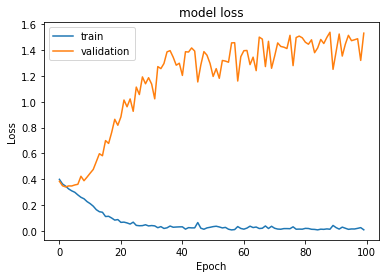

In [156]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_8.history['loss'])
plt.plot(history_8.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that the train and validation curves are smooth.

Best Threshold=0.035341, G-Mean=0.717


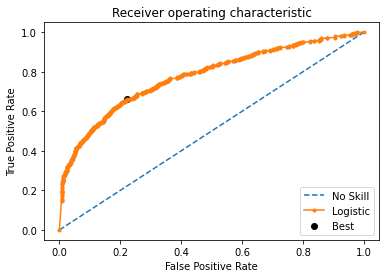

In [157]:
# predict probabilities
yhat8 = model8.predict(X_test)
# keep probabilities for the positive outcome only
yhat8 = yhat8[:, 0]
# calculate roc curves
fpr, tpr, thresholds8 = roc_curve(y_test, yhat8)
# calculate the g-mean for each threshold
gmeans8 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans8)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds8[ix], gmeans8[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label ='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

In [158]:
y_pred_e8 = model8.predict(X_test)
y_pred_e8 = (y_pred_e8 > thresholds8[ix])
y_pred_e8

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

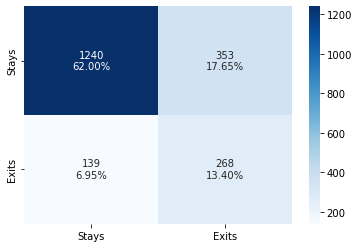

In [197]:
#Calculating the confusion matrix 
cm8=confusion_matrix(y_test, y_pred_e8)
categories = ['Stays','Exits']
make_confusion_matrix(cm8, 
                      categories=categories, 
                      cmap='Blues')

In [160]:
#Accuracy as per the classification report 
cr8=metrics.classification_report(y_test,y_pred_e8)
print(cr8)

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1593
           1       0.43      0.66      0.52       407

    accuracy                           0.75      2000
   macro avg       0.67      0.72      0.68      2000
weighted avg       0.80      0.75      0.77      2000



* After using the suggested hyperparameters from Keras Tuner, the score decreased a lot, and the False Negative rate is not comparable to the previous optimization technique model.

* Let's try to apply SMOTE to balance this dataset and then apply hyperparamter tuning accordingly.

### SMOTE + Keras Tuner

In [161]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [162]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [163]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [164]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

INFO:tensorflow:Reloading Tuner from .\Job_Switch\tuner0.json


In [165]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_6

In [166]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [167]:
tuner_2.results_summary()

Results summary
Results in .\Job_Switch
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 32
units_4: 224
units_5: 32
units_6: 256
units_7: 96
units_8: 192
Score: 0.860936681429545
Trial summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.8472004135449728
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8392203052838644
Trial summary
Hyperparameters:
num_layers: 5
units_0: 32
units_1: 64
learning_rate: 0.01
units_2: 96
units_3: 256
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8288853963216146
Trial summary
Hyperparameters:
num_layers: 10
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
un

We can consider creating a model with the below parameters:
- **Hyperparameters:**
- learning_rate: 0.001
- num_layers: 5
- units_0: 160
- units_1: 160
- units_2: 224
- units_3: 128
- units_4: 224

### Model 9

In [168]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [169]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [170]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               3680      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 123,425
Trainable params: 123,425
Non-trai

In [171]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 [==============================] - 2s 6ms/step - loss: 0.4528 - accuracy: 0.7884 - val_loss: 0.4263 - val_accuracy: 0.8108
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 0.3953 - accuracy: 0.8234 - val_loss: 0.6569 - val_accuracy: 0.6558
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.3701 - accuracy: 0.8347 - val_loss: 0.4225 - val_accuracy: 0.8155
Epoch 4/50
160/160 [==============================] - 1s 4ms/step - loss: 0.3381 - accuracy: 0.8529 - val_loss: 0.3819 - val_accuracy: 0.8297
Epoch 5/50
160/160 [==============================] - 1s 4ms/step - loss: 0.3111 - accuracy: 0.8695 - val_loss: 0.3524 - val_accuracy: 0.8454
Epoch 6/50
160/160 [==============================] - 1s 4ms/step - loss: 0.2896 - accuracy: 0.8803 - val_loss: 0.3059 - val_accuracy: 0.8779
Epoch 7/50
160/160 [==============================] - 1s 5ms/step - loss: 0.2683 - accuracy: 0.8893 - val_loss: 0.3190 - val_accuracy: 0.8650
Epoch 

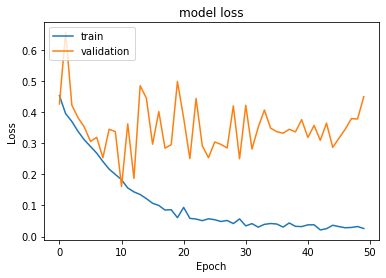

In [172]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model.

Best Threshold=0.037473, G-Mean=0.722


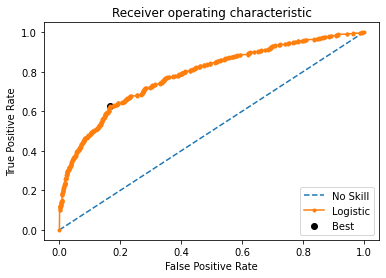

In [173]:
# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label ='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

In [174]:
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

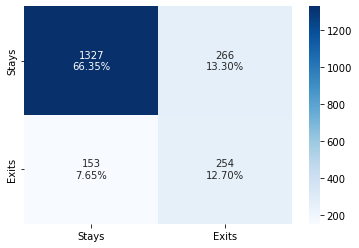

In [198]:
#Calculating the confusion matrix 
cm9=confusion_matrix(y_test, y_pred_e9)
categories = ['Stays','Exits']
make_confusion_matrix(cm9, 
                      categories=categories, 
                      cmap='Blues')

In [176]:
#Accuracy as per the classification report 
cr9=metrics.classification_report(y_test,y_pred_e9)
print(cr9)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1593
           1       0.49      0.62      0.55       407

    accuracy                           0.79      2000
   macro avg       0.69      0.73      0.71      2000
weighted avg       0.81      0.79      0.80      2000



After applying the SMOTE technique to the data, the recall score decreased a lot, and the False Negative rate increased, but if you see the loss curves of train and validation, the model seems to have overfit and includes so much noise. 

### Model 10

Let's use Grid Search CV and see if we can increase the model's performance on the metrics.

In [177]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [178]:
def create_model_v10(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [179]:
keras_estimator = KerasClassifier(build_fn=create_model_v10, verbose=1)

In [180]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
50/50 [==============================] - 1s 9ms/step - loss: 0.4301 - accuracy: 0.8050 - val_loss: 0.3722 - val_accuracy: 0.8506


In [181]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.840875 using {'batch_size': 128, 'lr': 0.01}


In [182]:
estimator_v10=create_model_v10(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               5888      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [183]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v10.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_10=estimator_v10.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
80/80 [==============================] - 2s 9ms/step - loss: 0.4720 - accuracy: 0.7778 - val_loss: 0.4139 - val_accuracy: 0.8285
Epoch 2/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4264 - accuracy: 0.8090 - val_loss: 0.5021 - val_accuracy: 0.6786
Epoch 3/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4132 - accuracy: 0.8128 - val_loss: 0.4498 - val_accuracy: 0.7849
Epoch 4/50
80/80 [==============================] - 0s 6ms/step - loss: 0.3928 - accuracy: 0.8227 - val_loss: 0.5436 - val_accuracy: 0.6958
Epoch 5/50
80/80 [==============================] - 0s 6ms/step - loss: 0.3887 - accuracy: 0.8244 - val_loss: 0.4203 - val_accuracy: 0.7940
Epoch 6/50
80/80 [==============================] - 0s 6ms/step - loss: 0.3848 - accuracy: 0.8237 - val_loss: 0.3492 - val_accuracy: 0.8615
Epoch 7/50
80/80 [==============================] - 1s 7ms/step - loss: 0.3808 - accuracy: 0.8304 - val_loss: 0.3996 - val_accuracy: 0.8073
Epoch 8/50
80/80 [==

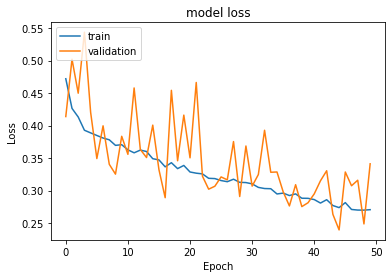

In [184]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_10.history['loss'])
plt.plot(history_10.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model. 

Grid Search CV also does not seem to work that well on the SMOTE data.

Best Threshold=0.201324, G-Mean=0.736


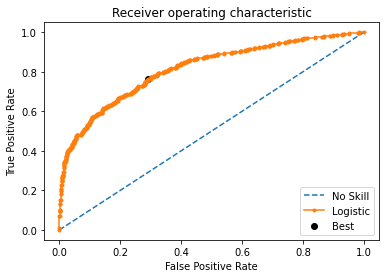

In [185]:
# predict probabilities
yhat10 = estimator_v10.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label ='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

In [186]:
y_pred_e10=estimator_v10.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

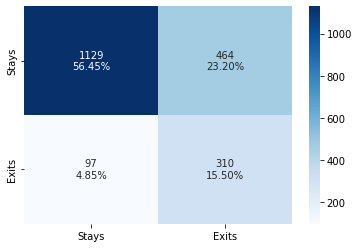

In [199]:
#Calculating the confusion matrix 
cm10=confusion_matrix(y_test, y_pred_e10)
categories = ['Stays','Exits']
make_confusion_matrix(cm10, 
                      categories=categories, 
                      cmap='Blues')

In [188]:
#Accuracy as per the classification report 
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1593
           1       0.40      0.76      0.52       407

    accuracy                           0.72      2000
   macro avg       0.66      0.74      0.66      2000
weighted avg       0.81      0.72      0.74      2000



Oversampling using SMOTE with GridSearchCV parameters helped the model improve the recall score. 

In this dataset, the SMOTE oversampling technique does work like a RandomSearch, as both the models we tried building have overfitted on the training dataset.

### Results

Below table shows all the model we tried with different parameters which helps the model to perform well on any data. So, our final model with good recall score is **Model 5**, which uses the L2regularization technique and works on the imbalanced dataset.

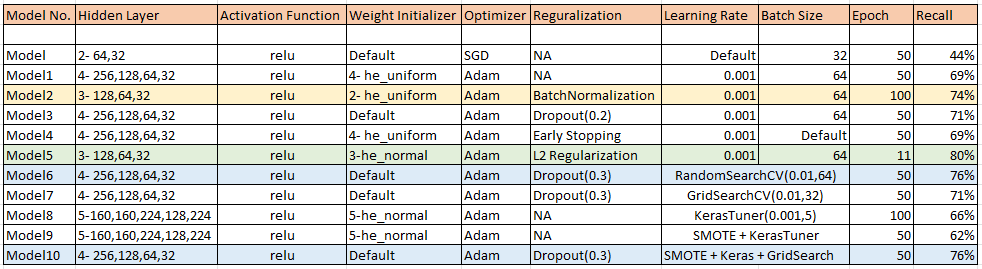

### Actionable Insights

In addition to above models, below listed items can be tried to increase the Recall further.

- Feature engineering can be used to figure out the right features. 
- Models can be tried with different hyperparameters
- Try to do better feature engineerning by removing the flaws of the skewed variables if required.

### Business Recommendations

- With this Artificial Neural Network model, managers and stakeholders in the bank industry can increase their revenue by identifying the customers that will likely leave the bank.

- This process is easier and more time-efficient and which helps bank indirectly to save lot of efforts. 

- The optimised model gives better results as seen from the confusion matrix as well as an improved Recall score.

- Machine learning allows bank to find early signs of desertion before it is too late using the available data.

- This will also help them to improve benefits in many ways as like some listed below.
-- To identify bank's problems
-- Improves brand reputation
-- Increase Revenue

- Especially Neural Designer uses artificial intelligence to discover the reasons for dissatisfaction, assess the risk of churn, and improve clients' loyalty.